In [1]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, SimpleRNN
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image
from PIL import UnidentifiedImageError

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import itertools
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
#upright = os.listdir(r'/content/drive/MyDrive/posture/Upright Sitting')
#Crossed_legs = os.listdir(r'/content/drive/MyDrive/posture/Crossing legs')
#slant_bending = os.listdir(r'/content/drive/MyDrive/posture/Slant Bending')
#Lordosis = os.listdir(r'/content/drive/MyDrive/posture/Lordosis')
#slouching = os.listdir(r'/content/drive/MyDrive/posture/Slouching')

MPII = os.listdir('C:/Users/Dell/data/MPII')
bicycling = os.listdir('C:/Users/Dell/data/MPII_DA/bicycling')
#conditioning_exercise = os.listdir('C:/Users/Dell/data/MPII/conditioning_exercise')
dancing = os.listdir('C:/Users/Dell/data/MPII_DA/dancing')
#fishing_and_hunting = os.listdir('C:/Users/Dell/data/MPII/fishing_and_hunting')
#home_repair = os.listdir('C:/Users/Dell/data/MPII/home_repair')
#home_activities = os.listdir('C:/Users/Dell/data/MPII/home_activities')
#inactivity = os.listdir('C:/Users/Dell/data/MPII/inactivity')
#lawn_and_garden = os.listdir('C:/Users/Dell/data/MPII/lawn_and_garden')
#miscellaneous = os.listdir('C:/Users/Dell/data/MPII/miscellaneous')
#music_playing = os.listdir('C:/Users/Dell/data/MPII/music_playing')
#occupation = os.listdir('C:/Users/Dell/data/MPII/occupation')
#religious_activities = os.listdir('C:/Users/Dell/data/MPII/religious_activities')
running = os.listdir('C:/Users/Dell/data/MPII_DA/running')
#self_care = os.listdir('C:/Users/Dell/data/MPII/self_care')
#sports = os.listdir('C:/Users/Dell/data/MPII/sports')
#transportation = os.listdir('C:/Users/Dell/data/MPII/transportation')
#volunteer_activities = os.listdir('C:/Users/Dell/data/MPII/volunteer_activities')
walking = os.listdir('C:/Users/Dell/data/MPII_DA/walking')
#water_activities = os.listdir('C:/Users/Dell/data/MPII/water_activities')
#winter_activities = os.listdir('C:/Users/Dell/data/MPII/winter_activities')

In [4]:
img_w, img_h = 224, 224 #setting the image width and height for easy processing
X = []
y = []

for i in bicycling:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/bicycling/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError: # it passes an image that wasn't correctly identified
        pass
    
    
for i in dancing:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/dancing/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass
    

for i in running:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/running/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass


for i in walking:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/walking/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(3)
    except UnidentifiedImageError:
        pass
    

X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

# I resized each image to our manually defined width and height(img_w, img_h)
# I also changed the images to an array



(2787, 224, 224, 3) (2787,)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [ ]:
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

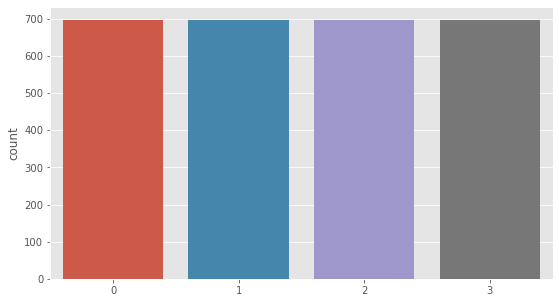

In [5]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

In [6]:
x = X.astype('float32')
x /= 255

#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

num_classes = 4

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0. 0. 0.]


In [7]:
# splitting our dataset into train and test
x_train1, x_test, y_train1, y_test = train_test_split(x, labels, test_size = 0.10, random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.10,random_state=5)


print('Number of train: {}'.format(len(x_train)))
print('Number of validation: {}'.format(len(x_val)))
print('Number of test: {}'.format(len(x_test)))

Number of train: 2257
Number of validation: 251
Number of test: 279


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, Xception
from tensorflow.keras.layers import Concatenate, Input, GlobalAveragePooling2D, Dense

# define input shape
input_shape = (224, 224, 3)

# define input tensor
input_tensor = Input(shape=input_shape)

# instantiate MobileNetV2 model
mobilenetv2_model = MobileNetV2(input_tensor=input_tensor, weights='imagenet', include_top=False)

# Create a new model using the pre-trained OptiNetV2 as the base model
x = mobilenetv2_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
mobilenetv2_output = Dense(units=512, activation='relu')(x)
#model = Model(inputs=base_model.input, outputs=output_layer)


# set the layers to be trainable
for layer in mobilenetv2_model.layers[:-20]:
    layer.trainable = False

# instantiate Xception model
xception_model = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)

x = xception_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
xception_output = Dense(units=512, activation='relu')(x)

# set the layers to be trainable
for layer in xception_model.layers[:-20]:
    layer.trainable = False


# concatenate the output tensors
concat = Concatenate()([mobilenetv2_output, xception_output])

# add dense layer for classification
fc = Dense(units=4, activation='softmax')(concat)

# create the final model
model = tf.keras.models.Model(inputs=input_tensor, outputs=fc)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print model summary
model.summary()

# fit the model
#history = model.fit(train_data, epochs=10, validation_data=valid_data)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [9]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Implement a learning rate schedule
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Implement early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)


In [10]:
history= model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=50, callbacks=[lr_scheduler, early_stop])

# Save the weights of the pre-trained model
model.save_weights('optinetv2_weights.h5')

Epoch 1/50
71/71 [==============================] - 646s 8s/step - loss: 0.5098 - accuracy: 0.8210 - val_loss: 6.0908 - val_accuracy: 0.5936 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - 551s 8s/step - loss: 0.2439 - accuracy: 0.9278 - val_loss: 1.0940 - val_accuracy: 0.8327 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - 640s 9s/step - loss: 0.1503 - accuracy: 0.9513 - val_loss: 3.4421 - val_accuracy: 0.6972 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - 5341s 76s/step - loss: 0.1764 - accuracy: 0.9517 - val_loss: 0.7730 - val_accuracy: 0.8685 - lr: 0.0010
Epoch 5/50
71/71 [==============================] - 759s 11s/step - loss: 0.1119 - accuracy: 0.9650 - val_loss: 2.5469 - val_accuracy: 0.7928 - lr: 0.0010
Epoch 6/50
71/71 [==============================] - 777s 11s/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 1.6347 - val_accuracy: 0.8606 - lr: 5.0000e-04
Epoch 7/50
71/71 [==============================] - 682s 10s/step - 

In [11]:
Test_data = model.evaluate(x_test, y_test)

9/9 [==============================] - 59s 6s/step - loss: 0.3045 - accuracy: 0.9642


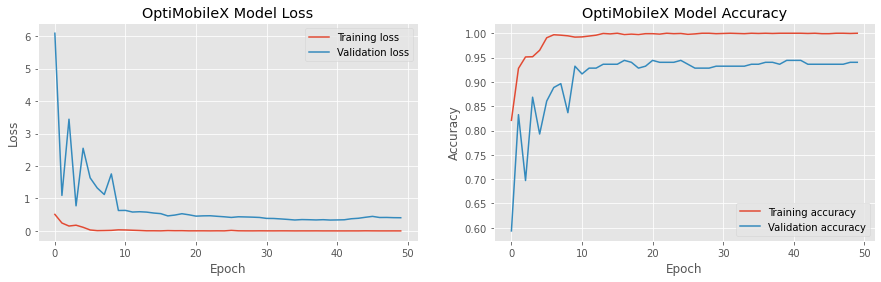

In [13]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs_range = range(len(history.history['val_accuracy']))
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.title('OptiMobileX Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('OptiMobileX Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


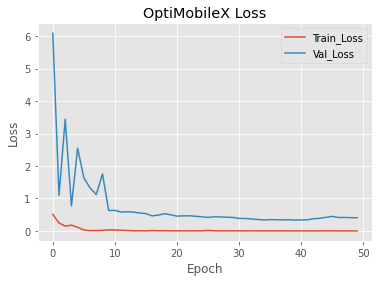

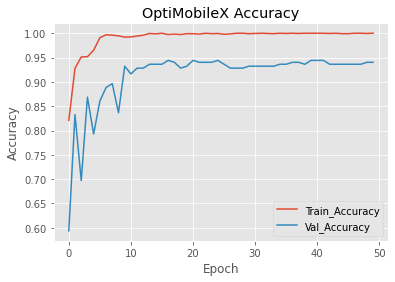

In [12]:

# Plot the loss graph
plt.plot(history.history['loss'], label='Train_Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('OptiMobileX Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Train_Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('OptiMobileX Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

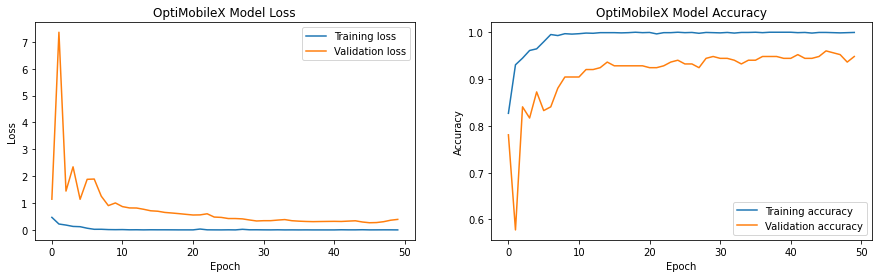

In [12]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs_range = range(len(history.history['val_accuracy']))
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.title('OptiMobileX Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('OptiMobileX Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


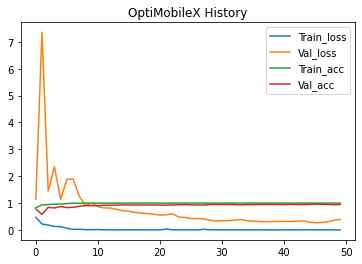

In [13]:
# Plot the loss and accuracy graphs
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label='Val_acc')
plt.title('OptiMobileX History')
plt.legend()
plt.show()

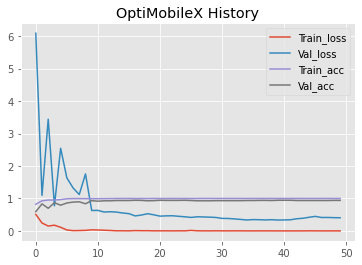

In [14]:
# Plot the loss and accuracy graphs
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label='Val_acc')
plt.title('OptiMobileX History')
plt.legend()
plt.show()

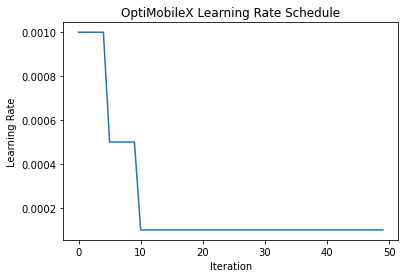

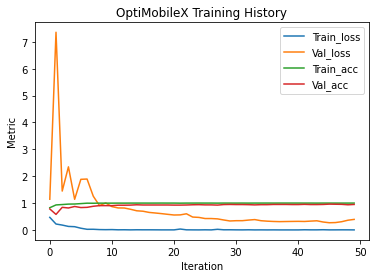

In [14]:
# Plot the learning rate and iteration graphs
iterations = np.arange(0, len(history.history['loss']))
lrs = [lr_schedule(i) for i in range(len(history.history['loss']))]

plt.plot(iterations, lrs)
plt.title('OptiMobileX Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

plt.plot(iterations, history.history['loss'], label='Train_loss')
plt.plot(iterations, history.history['val_loss'], label='Val_loss')
plt.plot(iterations, history.history['accuracy'], label='Train_acc')
plt.plot(iterations, history.history['val_accuracy'], label='Val_acc')
plt.legend()
plt.title('OptiMobileX Training History')
plt.xlabel('Iteration')
plt.ylabel('Metric')
plt.show()

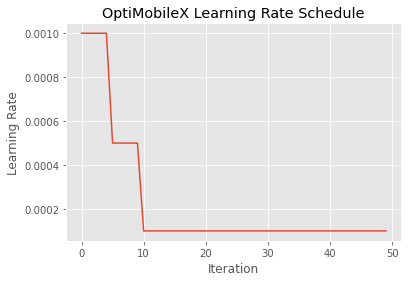

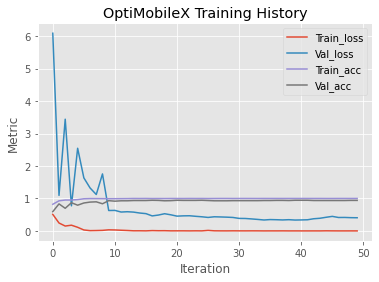

In [15]:
# Plot the learning rate and iteration graphs
iterations = np.arange(0, len(history.history['loss']))
lrs = [lr_schedule(i) for i in range(len(history.history['loss']))]

plt.plot(iterations, lrs)
plt.title('OptiMobileX Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

plt.plot(iterations, history.history['loss'], label='Train_loss')
plt.plot(iterations, history.history['val_loss'], label='Val_loss')
plt.plot(iterations, history.history['accuracy'], label='Train_acc')
plt.plot(iterations, history.history['val_accuracy'], label='Val_acc')
plt.legend()
plt.title('OptiMobileX Training History')
plt.xlabel('Iteration')
plt.ylabel('Metric')
plt.show()

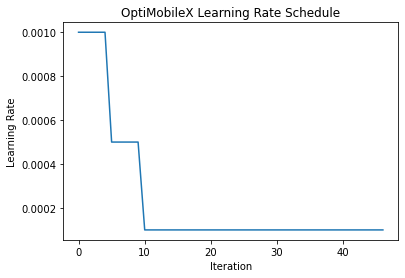

In [30]:
# Plot the learning rate and iteration graphs
iterations = np.arange(0, len(history.history['loss']))
lrs = [lr_schedule(i) for i in range(len(history.history['loss']))]

plt.plot(iterations, lrs)
plt.title('OptiMobileX Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

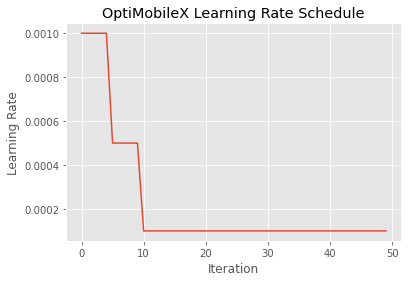

In [16]:
# Plot the learning rate and iteration graphs
iterations = np.arange(0, len(history.history['loss']))
lrs = [lr_schedule(i) for i in range(len(history.history['loss']))]

plt.plot(iterations, lrs)
plt.title('OptiMobileX Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

9/9 [==============================] - 87s 9s/step
OptiMobileX Model Confusion Matrix
Classification Report
              precision    recall  f1-score   support

   Bicycling       0.97      1.00      0.99        71
     Dancing       1.00      0.97      0.98        60
     Running       0.93      0.96      0.94        71
     Walking       0.96      0.94      0.95        77

    accuracy                           0.96       279
   macro avg       0.97      0.96      0.97       279
weighted avg       0.96      0.96      0.96       279



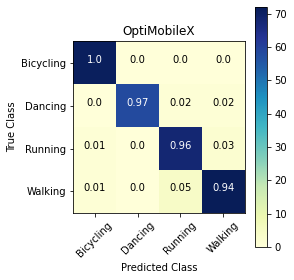

In [15]:
# here i want to define and plot my confusion matrix
# and also my classification report
def plot_confusion_matrix(cm, classes, normalize=True, title='OptiMobileX Model Confusion matrix', cmap=plt.cm.YlGnBu):
    
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
    
y_pred = (model.predict(x_test) > 0.5).astype("int32")

y_test_c = np.argmax(y_test, axis=1)
target_names = ["Bicycling", "Dancing", "Running", "Walking"]

Y_pred = np.argmax(model.predict(x_test),axis=1)
print('OptiMobileX Model Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=True, title='OptiMobileX')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))


9/9 [==============================] - 64s 7s/step
OptiMobileX Model Confusion Matrix
Classification Report
              precision    recall  f1-score   support

   Bicycling       0.97      0.97      0.97        71
     Dancing       1.00      0.98      0.99        60
     Running       0.95      0.97      0.96        71
     Walking       0.95      0.94      0.94        77

    accuracy                           0.96       279
   macro avg       0.97      0.97      0.97       279
weighted avg       0.96      0.96      0.96       279



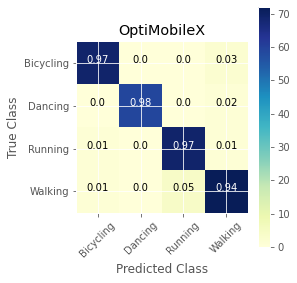

In [17]:
# here i want to define and plot my confusion matrix
# and also my classification report
def plot_confusion_matrix(cm, classes, normalize=True, title='OptiMobileX Model Confusion matrix', cmap=plt.cm.YlGnBu):
    
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
    
y_pred = (model.predict(x_test) > 0.5).astype("int32")

y_test_c = np.argmax(y_test, axis=1)
target_names = ["Bicycling", "Dancing", "Running", "Walking"]

Y_pred = np.argmax(model.predict(x_test),axis=1)
print('OptiMobileX Model Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=True, title='OptiMobileX')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))


9/9 [==============================] - 77s 9s/step


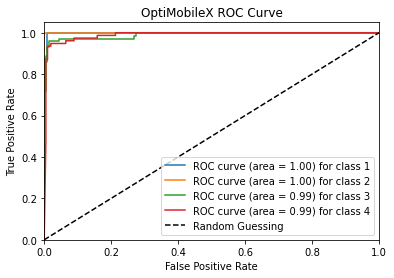

In [16]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)

# Get the true labels for the test set
y_pred  = x_test

y_test_c = np.argmax(y_test, axis=1)

# Get the false positive rate, true positive rate, and threshold values for each class
fpr = {}
tpr = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:, i], y_pred_prob[:, i])

# Compute the area under the curve for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i+1))

# Plot the random guessing curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OptiMobileX ROC Curve')
plt.legend(loc="lower right")
plt.show()


9/9 [==============================] - 57s 6s/step


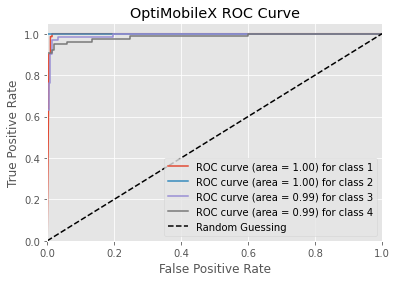

In [18]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)

# Get the true labels for the test set
y_pred  = x_test

y_test_c = np.argmax(y_test, axis=1)

# Get the false positive rate, true positive rate, and threshold values for each class
fpr = {}
tpr = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:, i], y_pred_prob[:, i])

# Compute the area under the curve for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i+1))

# Plot the random guessing curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('OptiMobileX ROC Curve')
plt.legend(loc="lower right")
plt.show()


9/9 [==============================] - 82s 9s/step


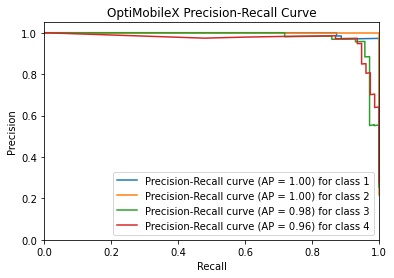

In [17]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)


# Get the true labels for the test set
y_pred  = x_test

y_test_c = np.argmax(y_test, axis=1)

# Get the precision, recall, and threshold values for each class
precision = {}
recall = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    precision[i], recall[i], thresh[i] = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])

# Compute the average precision score for each class
avg_precision = {}
for i in range(n_classes):
    avg_precision[i] = average_precision_score(y_test[:, i], y_pred_prob[:, i])

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve (AP = %0.2f) for class %d' % (avg_precision[i], i+1))

# Set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OptiMobileX Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


9/9 [==============================] - 65s 7s/step


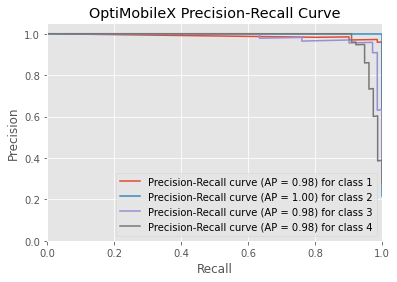

In [19]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)


# Get the true labels for the test set
y_pred  = x_test

y_test_c = np.argmax(y_test, axis=1)

# Get the precision, recall, and threshold values for each class
precision = {}
recall = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    precision[i], recall[i], thresh[i] = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])

# Compute the average precision score for each class
avg_precision = {}
for i in range(n_classes):
    avg_precision[i] = average_precision_score(y_test[:, i], y_pred_prob[:, i])

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve (AP = %0.2f) for class %d' % (avg_precision[i], i+1))

# Set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('OptiMobileX Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


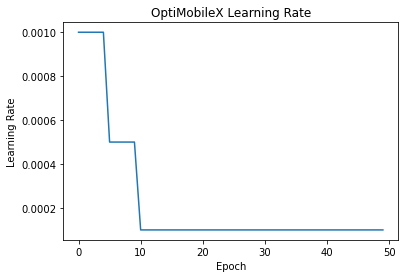

In [18]:
import matplotlib.pyplot as plt

# Get the learning rate history from the training
lr_history = history.history['lr']

# Plot the learning rate history
plt.plot(lr_history)
plt.title('OptiMobileX Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


In [20]:
y_pred= model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

9/9 [==============================] - 56s 6s/step


array([1, 0, 2, 1, 3, 0, 2, 0, 0, 3, 3, 0, 3, 0, 3], dtype=int64)

In [21]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [71 59 73 76]


In [22]:
y_test_new = np.argmax(y_test,axis=1)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       1.00      0.98      0.99        60
           2       0.95      0.97      0.96        71
           3       0.95      0.94      0.94        77

    accuracy                           0.96       279
   macro avg       0.97      0.97      0.97       279
weighted avg       0.96      0.96      0.96       279



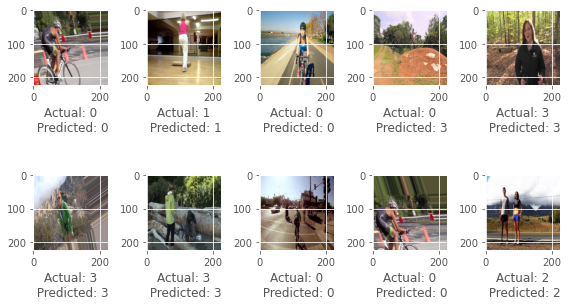

In [25]:
plt.figure(figsize=(8,5))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()